In [1]:
import pandas as pd

**EDA**

In [3]:
events = pd.read_csv('train_events.csv')
targets = pd.read_csv('train_targets.csv')
info = pd.read_csv('video_info_v2.csv')

In [5]:
!pip install holidays

   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   --------- ------------------------------ 0.3/1.1 MB ? eta -:--:--
   ------------------- -------------------- 0.5/1.1 MB 929.6 kB/s eta 0:00:01
   ----------------------------- ---------- 0.8/1.1 MB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 1.0 MB/s eta 0:00:00


In [7]:
import pandas as pd
import holidays

def feauture_engineering(info, events, targets):
    
    merged_df = events.merge(info, on='rutube_video_id', how='left')
    merged_df = merged_df.merge(targets, on='viewer_uid', how='left')

    timing = [['Chelyabinsk', 55.164440, 61.436844, 2],
    ['Bashkortostan Republic', 54.733334, 56.000000, 2],
    ['St.-Petersburg', 59.937500, 30.308611, 0],
    ['Moscow', 55.751244, 37.618423, 0],
    ['Rostov', 47.233334, 39.700001, 0],
    ['Moscow Oblast', 55.688713, 37.901073, 0],
    ['Kursk Oblast', 51.72724, 36.1819885, 0],
    ["Kemerovo Oblast", 55.397158482091676,86.08608849999993, 4],
    ['Arkhangelskaya', 55.3971584,86.086088, 4],
    ['Tomsk Oblast', 58.452881066,82.217946999,3 ],
    ['Novosibirsk Oblast',55.312665,80.10165099,3],
    ['Sverdlovsk Oblast', 59.127117093,61.70684450, 2],
    ["Leningradskaya Oblast'", 59.9054522,31.150829499, 0],
    ['Krasnodar Krai', 45.172112768157305,39.132522999999985, 0],
    ['Tatarstan Republic', 55.34942683987562,50.75072150000001, 0 ],
    ['Belgorod Oblast', 50.62046928285019,37.30325199999993, 0 ],
    ['Kuzbass', 54.56576210852105,86.92748649999996, 4],
    ['Udmurtiya Republic', 57.22512531924305,52.77912649999997, 1],         
    ['Chuvashia', 55.471785695073834,47.16590449999997, 0],
    ['Ryazan Oblast', 54.350502955268254,40.675123499999984, 0 ], 
    ['Perm Krai', 58.76847292757172,56.46289693749999, 2], 
    ['Sakha', 68.82896120811223,134.182158, 7], 
    ['Orenburg Oblast', 52.47286736336016,56.228958499999955, 2],
    ['Primorye', 45.3915801269829,134.79542, 7],
    ['Zabaykalskiy (Transbaikal) Kray', 54.05648198034125,114.940056, 6],
    ['Bryansk Oblast', 53.13164017743157,33.95804509765627, 0],
    ['Tver Oblast', 57.28302363917129,34.547247500000005, 0],
    ['Stavropol Kray', 44.962321396203535,43.280902500000025, 0],
    ['Khabarovsk', 48.46509300890901,135.05956949999992, 7], 
    ['Penza Oblast', 53.16960581735001,44.53174799999999, 0],
    ['Mariy-El Republic', 56.593179998283055,47.91293499999987, 0], 
    ['Smolensk Oblast', 54.759503608109426,33.0717155, 0], 
    ['Tambov Oblast', 52.719618527994946,41.582399499999994, 0],
    ['Novgorod Oblast', 58.194505074557156,32.92515499999999, 0], 
    ['Khakasiya Republic', 53.41183539528269,89.89058349999988, 4], 
    ['Ulyanovsk', 53.736578371852154,48.02049499999991, 0],
    ['Volgograd Oblast', 49.38276833036714,44.29958700000002, 0], 
    ['Irkutsk Oblast', 58.33800931840556,107.39237949999999, 5], 
    ['Komi', 64.1930784576565,55.82547999999998, 0 ],
    ['Nizhny Novgorod Oblast', 56.319763999313615,44.774041499999925, 0], 
    ['Krasnoyarsk Krai', 56.02309737020559,92.87417199999999, 4], 
    ['Krasnoyarskiy', 56.02309737020559,92.87417199999999, 4], 
    ['Kurgan Oblast', 55.537663414455785, 65.34517849999992, 2],
    ['Kirov Oblast', 58.6517120194155,50.09771400000001, 0],
    ['Omsk Oblast', 56.091496481782556,73.33051, 3],
    ['Vladimir Oblast', 55.966669740591605,40.62147549999991, 0],
    ['Yaroslavl Oblast', 57.76420460651379,39.26104049999993, 0], 
    ['Saratov Oblast', 51.33500640374433,46.668346, 1], 
    ['Khanty-Mansia', 62.36096919754708,72.59026649999994, 2],
    ['Tula Oblast', 53.90967545115921,37.42569249999997, 0],
    ['Amur Oblast', 53.15285281137059,127.28828449999989, 6],
    ['Altay Kray', 52.58813907903362,82.52956799999998, 4], 
    ['Buryatiya Republic', 53.763724745648034,107.77569499999991, 5],          
    ['Dagestan', 43.11906292694195,46.95042549999997,0 ],
    ['Kaluga Oblast', 54.327256871618175,35.35889799999998, 0], 
    ['Kaliningrad Oblast', 54.85328020100932,21.185696999999937, -1], 
    ['Murmansk', 68.97346325890771,33.11350049999999, 0],
    ['Samara Oblast', 53.32213850559074,50.0613185,0 ], 
    ['Stavropol’ Kray', 44.962321396203535,43.280902500000025, 0], 
    ['Voronezh Oblast', 50.8475297876064,40.542550000000006,0 ], 
    ['Kursk', 51.727245371240414,36.1819885,0],
    ['Sverdlovsk', 56.78875104810377,60.47506549999994,2 ], 
    ['Karelia', 63.833324008149866,33.626316999999986, 0], 
    ['Lipetsk Oblast', 63.833324008149866,33.626316999999986, 0], 
    ['Adygeya Republic', 44.49337346898218,39.72976799999992, 0],         
    ['Ivanovo Oblast', 57.02939069613107, 41.23528797595396, 0],  
    ['Oryol oblast', 52.96806068861287,36.09647749999997, 0], 
    ['Tula', 54.18117312324303,37.61855149999991, 0], 
    ['Kamchatka', 58.55212543673119,164.97065199999994, 9],
    ['Tyumen Oblast', 65.97600874745626,72.60593749999994, 2], 
    ['Krasnodarskiy', 45.06611530619296,38.985679499999996,0 ],
    ['Pskov Oblast', 57.345418313942154,29.41655549999993, 0],
    ['Crimea', 45.22695079519681,34.52619099999999, 0], 
    ['Chechnya', 43.24770696832602,45.74760449999996, 0], 
    ['Saratovskaya Oblast', 51.33500640374433,46.668346, 1],
    ['Kalmykiya Republic', 46.4840572021929,44.66622599999996, 0],
    ['North Ossetia–Alania', 43.19451922924383,44.1785615, 0],
    ['Vologda Oblast', 59.2269726851761,39.87808849999995, 0],
    ['Karachayevo-Cherkesiya Republic', 43.84635249191414,41.678339499999936, 0],
    ['Voronezj', 51.694353052188156,39.342517499999914, 0 ],
    ['Chukotka', 67.21079556116099,174.4286590000001, 9],
    ['Mordoviya Republic', 54.42413324230496,44.44721149999996, 0 ],
    ['Kostroma Oblast', 57.7960710437116,40.90109899999997, 0], 
    ['Yamalo-Nenets', 68.59910700773399,74.00368949999998, 2],
    ['Magadan Oblast', 62.77930187230119,154.1120329999999, 8], 
    ['Altai', 52.58813907903362,82.52956799999998, 4], 
    ['Vladimir', 56.13484869872823,40.42268299999998, 0 ],
    ['Ivanovo', 57.008531555514175,40.99702549999998, 0],
    ['Astrakhan Oblast', 57.008531555514175,40.99702549999998, 0], 
    ['Penza', 53.16960581735001,44.53174799999999, 0], 
    ['Kabardino-Balkariya Republic', 43.45799365450804,43.43638699999996, 0],
    ['Jaroslavl', 57.65072373894173,39.85338499999994, 0], 
    ['Sakhalin Oblast', 49.1907912177877,148.86043649999988,8 ], 
    ['Sebastopol City', 44.58457138572299,33.551172999999984,0 ],
    ['Tyumen’ Oblast', 65.97600874745626,72.60593749999994, 2], 
    ['Kirov', 58.58354002108756,49.5708654999999, 0], 
    ['Orel Oblast', 52.96806068861287,36.09647749999997, 0], 
    ['Omsk', 55.12277356552416,73.37892449999987, 3],
    ['Smolenskaya Oblast’', 54.759503608109426,33.0717155, 0],
    ['Nenets', 68.59910700773399,74.00368949999998, 2],
    ['Tver’ Oblast', 57.28302363917129,34.547247500000005, 0],
    ['Jewish Autonomous Oblast', 48.582238455455155,132.75737599999988, 7],
    ['Ingushetiya Republic', 43.116568681445145,44.83647899999998, 0], 
    ['Kaluga', 54.53649918608257,36.19510799999998, 0],
    ['Kaliningrad', 54.70490072495566,20.47380049999995, -1], 
    ['North Ossetia', 43.19451922924383,44.1785615, 0], 
    ['Perm', 58.99598962027029,55.627935999999984, 2],
    ['Smolensk', 54.778982417479,31.999063999999933, 0],
    ['Primorskiy (Maritime) Kray', 45.3915801269829,134.79542, 7],
    ['Vologda', 59.2269726851761,39.87808849999995, 0], 
    ['Stavropol Krai', 44.962321396203535,43.280902500000025, 0],
    ['Astrakhan', 46.365374678235064,48.03652499999999, 0],
    ['Transbaikal Territory', 52.65980170185885,108.82449149999997, 6],
    ['Tambov', 52.719618527994946,41.582399499999994, 0], 
    ['Tyva Republic', 51.78014444811316,94.03271549999991, 4],
    ['Arkhangelsk Oblast', 63.11408433448725,39.8590082390835, 0],]



    timing_regions = {item[0] for item in timing}

    # Find regions in df that are not in timing
    missing_regions = set(merged_df['region']) - timing_regions

    print("Regions not in timing:", missing_regions)

    df_timing = pd.DataFrame(timing, columns = ['region', 'latitude', 'longitude', 'time_zone'])
    df_timing['time_zone'] = df_timing['time_zone'].astype(int)

    merged_df = merged_df.merge(df_timing, on='region', how='left')

    merged_df['event_timestamp'] = pd.to_datetime(merged_df['event_timestamp'], utc=True)
    merged_df['date'] = merged_df['event_timestamp'].dt.date
    merged_df['time_zone'] = merged_df['time_zone'].astype(int)

    merged_df['time'] = (merged_df['event_timestamp'].dt.hour + merged_df['time_zone']).astype(str).str.zfill(2) + merged_df['event_timestamp'].dt.strftime(':%M:%S')
    merged_df['date'] = merged_df['event_timestamp'].dt.date


    # Extract the hour component
   # merged_df['hour'] = merged_df['time'].dt.hour


    #merged_df['time'] = pd.to_datetime(merged_df['time'], format='%H:%M:%S')


    def adjust_hour(time_str):
        hours, minutes, seconds = map(int, time_str.split(':'))
        if hours >= 24:
            hours -= 24
        elif hours < 0:
            hours = 0
        return f'{hours}:{minutes:02}:{seconds:02}'


    merged_df['time'] = merged_df['time'].apply(adjust_hour)
    merged_df['time'] = merged_df['time'].apply(adjust_hour)


    merged_df['time'] = pd.to_datetime(merged_df['time'], format='%H:%M:%S')

    def categorize_time_of_day(time):
        hour = time.hour
        if 5 <= hour < 11:
            return 'morning'
        elif 11 <= hour < 17:
            return 'day'
        elif 17 <= hour < 23:
            return 'evening'
        else:
            return 'night'


    merged_df['time of day'] = merged_df['time'].apply(categorize_time_of_day)


    merged_df['time'] = pd.to_datetime(merged_df['time'])

    # Format the datetime objects to 'HH:MM:SS'
    merged_df['time'] = merged_df['time'].dt.strftime('%H:%M:%S')


    merged_df['date'] = pd.to_datetime(merged_df['date'], format='%H:%M:%S')

    # Create a Russian holidays object
    ru_holidays = holidays.Russia()

    # Define a function to classify the date
    def classify_date(date):
        if date.weekday() >= 5:  # Saturday (5) or Sunday (6)
            return 'weekend'
        elif date in ru_holidays:
            return 'Russian holiday'
        else:
            return 'weekday'

    # Apply the function to create the 'Day Type' column
    merged_df['Day Type'] = merged_df['date'].apply(classify_date)
    return merged_df


In [8]:
merged_df = feauture_engineering(info, events, targets)

In [25]:
merged_df

,event_timestamp,region,ua_device_type,ua_client_type,ua_os,ua_client_name,total_watchtime,rutube_video_id,viewer_uid,title,...,age,sex,age_class,latitude,longitude,time_zone,date,time,time of day,Day Type
0,2024-06-01 03:40:58+00:00,Chelyabinsk,desktop,browser,Windows,Yandex Browser,1883,video_133074,10067243,Папа с особенностями. Мужское / Женское. Выпус...,...,20,female,0,55.164440,61.436844,2,2024-06-01,05:40:58,morning,weekend
1,2024-06-01 16:33:24+00:00,Bashkortostan Republic,smartphone,mobile app,Android,Rutube,512,video_362960,10245341,Comedy Club: Мальдивы | Андрей Бебуришвили,...,40,female,2,54.733334,56.000000,2,2024-06-01,18:33:24,evening,weekend
2,2024-06-01 18:30:43+00:00,St.-Petersburg,desktop,browser,Windows,Chrome,5647,video_96775,10894333,"Новая Битва экстрасенсов, 24 сезон, 11 выпуск",...,23,male,1,59.937500,30.308611,0,2024-06-01,18:30:43,evening,weekend
3,2024-06-01 20:03:42+00:00,Moscow,smartphone,mobile app,Android,Rutube,1521,video_161610,10029092,Сергей Орлов-снял дом!!!,...,41,male,3,55.751244,37.618423,0,2024-06-01,20:03:42,evening,weekend
4,2024-06-01 19:48:09+00:00,Moscow,smartphone,mobile app,Android,Rutube,71,video_116245,10452976,Ищем сокровища в Полевском | Уральская Флоренц...,...,38,female,2,55.751244,37.618423,0,2024-06-01,19:48:09,evening,weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1759611,2024-06-30 14:08:36+00:00,Moscow,smartphone,mobile app,Android,Rutube,4230,video_162776,10026914,"Я знаю, но 1 сезон 3 серия",...,32,female,2,55.751244,37.618423,0,2024-06-30,14:08:36,day,weekend
1759612,2024-06-29 22:20:16+00:00,Moscow,smartphone,browser,Android,Firefox Mobile,382,video_316157,10417567,РЕАКЦИЯ ЮРИСТА НА TikTok | НЕАДЕКВАТНЫЕ СОТРУД...,...,48,male,3,55.751244,37.618423,0,2024-06-29,22:20:16,evening,weekend
1759613,2024-06-30 19:37:04+00:00,St.-Petersburg,desktop,browser,Windows,Microsoft Edge,1342,video_83304,10009094,Свои чужие дети. Мужское / Женское. Выпуск от ...,...,28,male,1,59.937500,30.308611,0,2024-06-30,19:37:04,evening,weekend
1759614,2024-06-30 08:33:09+00:00,St.-Petersburg,smartphone,mobile app,Android,Rutube,801,video_132769,10574374,"Коля, Коля, Николай. Мужское / Женское. Выпуск...",...,43,female,3,59.937500,30.308611,0,2024-06-30,08:33:09,morning,weekend


***Это используется для EDA в StreaLit***


In [21]:
def cleaning_data_category_region(df_without_tele):


    df_without_tele = df_without_tele[df_without_tele['category'] != 'Телепередачи']
    df_without_tele = df_without_tele[df_without_tele['category'] != 'Сериалы']
    df_without_tele = df_without_tele[df_without_tele['category'] != 'Фильмы']
    df_without_tele = df_without_tele[df_without_tele['category'] != 'Разное']

    category_counts = df_without_tele.groupby(['region', 'category']).size().reset_index(name='count')

    max_category = category_counts.loc[category_counts.groupby('region')['count'].idxmax()]


    df_result = pd.merge(max_category, df_without_tele[['region', 'category', 'latitude', 'longitude']], on=['region', 'category'], how='left')

    df_result = df_result.drop_duplicates(subset='region')


    df_result = df_result.rename(columns={'count': 'max_count'})
    
    return df_result

In [22]:
df_category_region = cleaning_data_category_region(merged_df)

In [23]:
df_category_region

,region,category,max_count,latitude,longitude
0,Adygeya Republic,Юмор,120,44.493373,39.729768
120,Altai,Развлечения,13,52.588139,82.529568
133,Altay Kray,Развлечения,345,52.588139,82.529568
478,Amur Oblast,Юмор,385,53.152853,127.288284
863,Arkhangelsk Oblast,Строительство и ремонт,1,63.114084,39.859008
...,...,...,...,...,...
54355,Voronezh Oblast,Развлечения,673,50.847530,40.542550
55028,Voronezj,Обучение,38,51.694353,39.342517
55066,Yamalo-Nenets,Интервью,82,68.599107,74.003689
55148,Yaroslavl Oblast,Юмор,651,57.764205,39.261040


In [40]:
def cleaning_data_median_age_region(df_1):
    # Ensure 'age' column is numeric to avoid issues during aggregation
    df_1['age'] = pd.to_numeric(df_1['age'], errors='coerce')

    # Group by 'region' and calculate the median age for each region
    median_age_per_region = df_1.groupby('region')['age'].median().reset_index()

    # Rename columns for clarity
    median_age_per_region.columns = ['region', 'median_age']

    # Merge the median age result with latitude and longitude from the original dataframe
    df_result = pd.merge(median_age_per_region, df_1[['region', 'latitude', 'longitude']].drop_duplicates(), on='region', how='left')

    return df_result

In [41]:
df_age_median_region = cleaning_data_median_age_region(merged_df)

In [42]:
df_age_median_region

,region,median_age,latitude,longitude
0,Adygeya Republic,33.0,44.493373,39.729768
1,Altai,28.0,52.588139,82.529568
2,Altay Kray,32.0,52.588139,82.529568
3,Amur Oblast,33.0,53.152853,127.288284
4,Arkhangelsk Oblast,38.0,63.114084,39.859008
...,...,...,...,...
111,Voronezh Oblast,31.0,50.847530,40.542550
112,Voronezj,34.0,51.694353,39.342517
113,Yamalo-Nenets,34.0,68.599107,74.003689
114,Yaroslavl Oblast,33.0,57.764205,39.261040


In [35]:
def cleaning_data_median_sex_region(df_1):


    category_counts = df_without_tele.groupby(['region', 'category']).size().reset_index(name='count')

    # Find the category with the maximum count for each region
    max_category = category_counts.loc[category_counts.groupby('region')['count'].idxmax()]

    # Merge with the original DataFrame to get latitude and longitude
    df_result = pd.merge(max_category, df_without_tele[['region', 'category', 'latitude', 'longitude']], on=['region', 'category'], how='left')

    # Drop duplicates to ensure one line per region
    df_result = df_result.drop_duplicates(subset='region')

    # Rename columns for the resulting DataFrame
    df_result = df_result.rename(columns={'count': 'max_count'})

    # Save the resulting DataFrame to a CSV fil

    # Display the resulting DataFrame
    return df_result

In [31]:
df_age_median_region

,region,median_age
0,Adygeya Republic,33.0
1,Altai,28.0
2,Altay Kray,32.0
3,Amur Oblast,33.0
4,Arkhangelsk Oblast,38.0
...,...,...
111,Voronezh Oblast,31.0
112,Voronezj,34.0
113,Yamalo-Nenets,34.0
114,Yaroslavl Oblast,33.0


In [43]:
def count_max_sex_per_region(df_1):
    # Ensure 'sex' column is categorical to allow for mode calculation
    df_1['sex'] = df_1['sex'].astype('category')

    # Group by 'region' and calculate the most frequent 'sex' in each region
    max_sex_per_region = df_1.groupby('region')['sex'].agg(lambda x: x.mode()[0]).reset_index()

    # Merge with latitude and longitude, ensuring uniqueness of regions
    df_result = pd.merge(max_sex_per_region, df_1[['region', 'latitude', 'longitude']].drop_duplicates(), on='region', how='left')

    return df_result

In [47]:
df_sex_region = count_max_sex_per_region(merged_df) 

In [48]:
df_sex_region

,region,sex,latitude,longitude
0,Adygeya Republic,female,44.493373,39.729768
1,Altai,female,52.588139,82.529568
2,Altay Kray,female,52.588139,82.529568
3,Amur Oblast,female,53.152853,127.288284
4,Arkhangelsk Oblast,female,63.114084,39.859008
...,...,...,...,...
111,Voronezh Oblast,female,50.847530,40.542550
112,Voronezj,female,51.694353,39.342517
113,Yamalo-Nenets,female,68.599107,74.003689
114,Yaroslavl Oblast,female,57.764205,39.261040


In [50]:
df_sex_region['sex'].value_counts()

sex
female    107
male        9
Name: count, dtype: int64

Врунишки

In [76]:
roblox = merged_df[merged_df['viewer_uid']==10174845]

Посчитайте в среднем возраст , что использует человек какой телефон

In [79]:
def calculate_mean_age_by_client_type(df):
    # Преобразуем колонку 'age' в числовой формат, если это необходимо
    df['age'] = pd.to_numeric(df['age'], errors='coerce')

    # Группировка по ua_client_type и вычисление среднего возраста
    mean_age_by_client_type = df.groupby('ua_client_type')['age'].mean().reset_index()

    # Переименовываем столбцы для ясности
    mean_age_by_client_type.columns = ['ua_client_type', 'mean_age']

    return mean_age_by_client_type

In [80]:
mean_age = calculate_mean_age_by_client_type(merged_df)

In [81]:
mean_age

,ua_client_type,mean_age
0,av,38.736842
1,browser,32.983891
2,mobile app,33.486568


посмотреть в зависимости от возраста сколько времени смотрит человек

In [82]:
def watchtime_by_age(df):
    # Преобразуем столбец 'age' в числовой формат, если это не сделано
    df['age'] = pd.to_numeric(df['age'], errors='coerce')

    # Преобразуем столбец 'total_watchtime' в числовой формат
    df['total_watchtime'] = pd.to_numeric(df['total_watchtime'], errors='coerce')

    # Группируем по возрасту и вычисляем среднее время просмотра
    watchtime_by_age_df = df.groupby('age')['total_watchtime'].mean().reset_index()

    # Переименовываем столбцы для ясности
    watchtime_by_age_df.columns = ['age', 'average_watchtime']

    return watchtime_by_age_df

In [83]:
watchtime_age = watchtime_by_age(merged_df)

In [89]:
watchtime_age.sort_values(by='average_watchtime', ascending=False)

,age,average_watchtime
6,17,2356.639706
14,25,2310.458970
24,35,2282.306213
26,37,2279.959904
17,28,2277.906390
23,34,2270.099197
18,29,2265.357560
12,23,2260.976111
25,36,2260.291025
20,31,2259.332946


In [77]:
merged_df['ua_client_type'].value_counts()

ua_client_type
mobile app    1140259
browser        619338
av                 19
Name: count, dtype: int64

In [96]:
!pip install stop_words

  Preparing metadata (setup.py) ... done
  Created wheel for stop_words: filename=stop_words-2018.7.23-py3-none-any.whl size=32895 sha256=714c91e545ca88e6b4b796f0c20bbe95cc46fe48b296a540b4fe9055cb8f4eaa
  Stored in directory: /root/.cache/pip/wheels/d0/1a/23/f12552a50cb09bcc1694a5ebb6c2cd5f2a0311de2b8c3d9a89
Successfully built stop_words


In [104]:
import re
from stop_words import get_stop_words
from wordcloud import WordCloud
import matplotlib.pyplot as plt

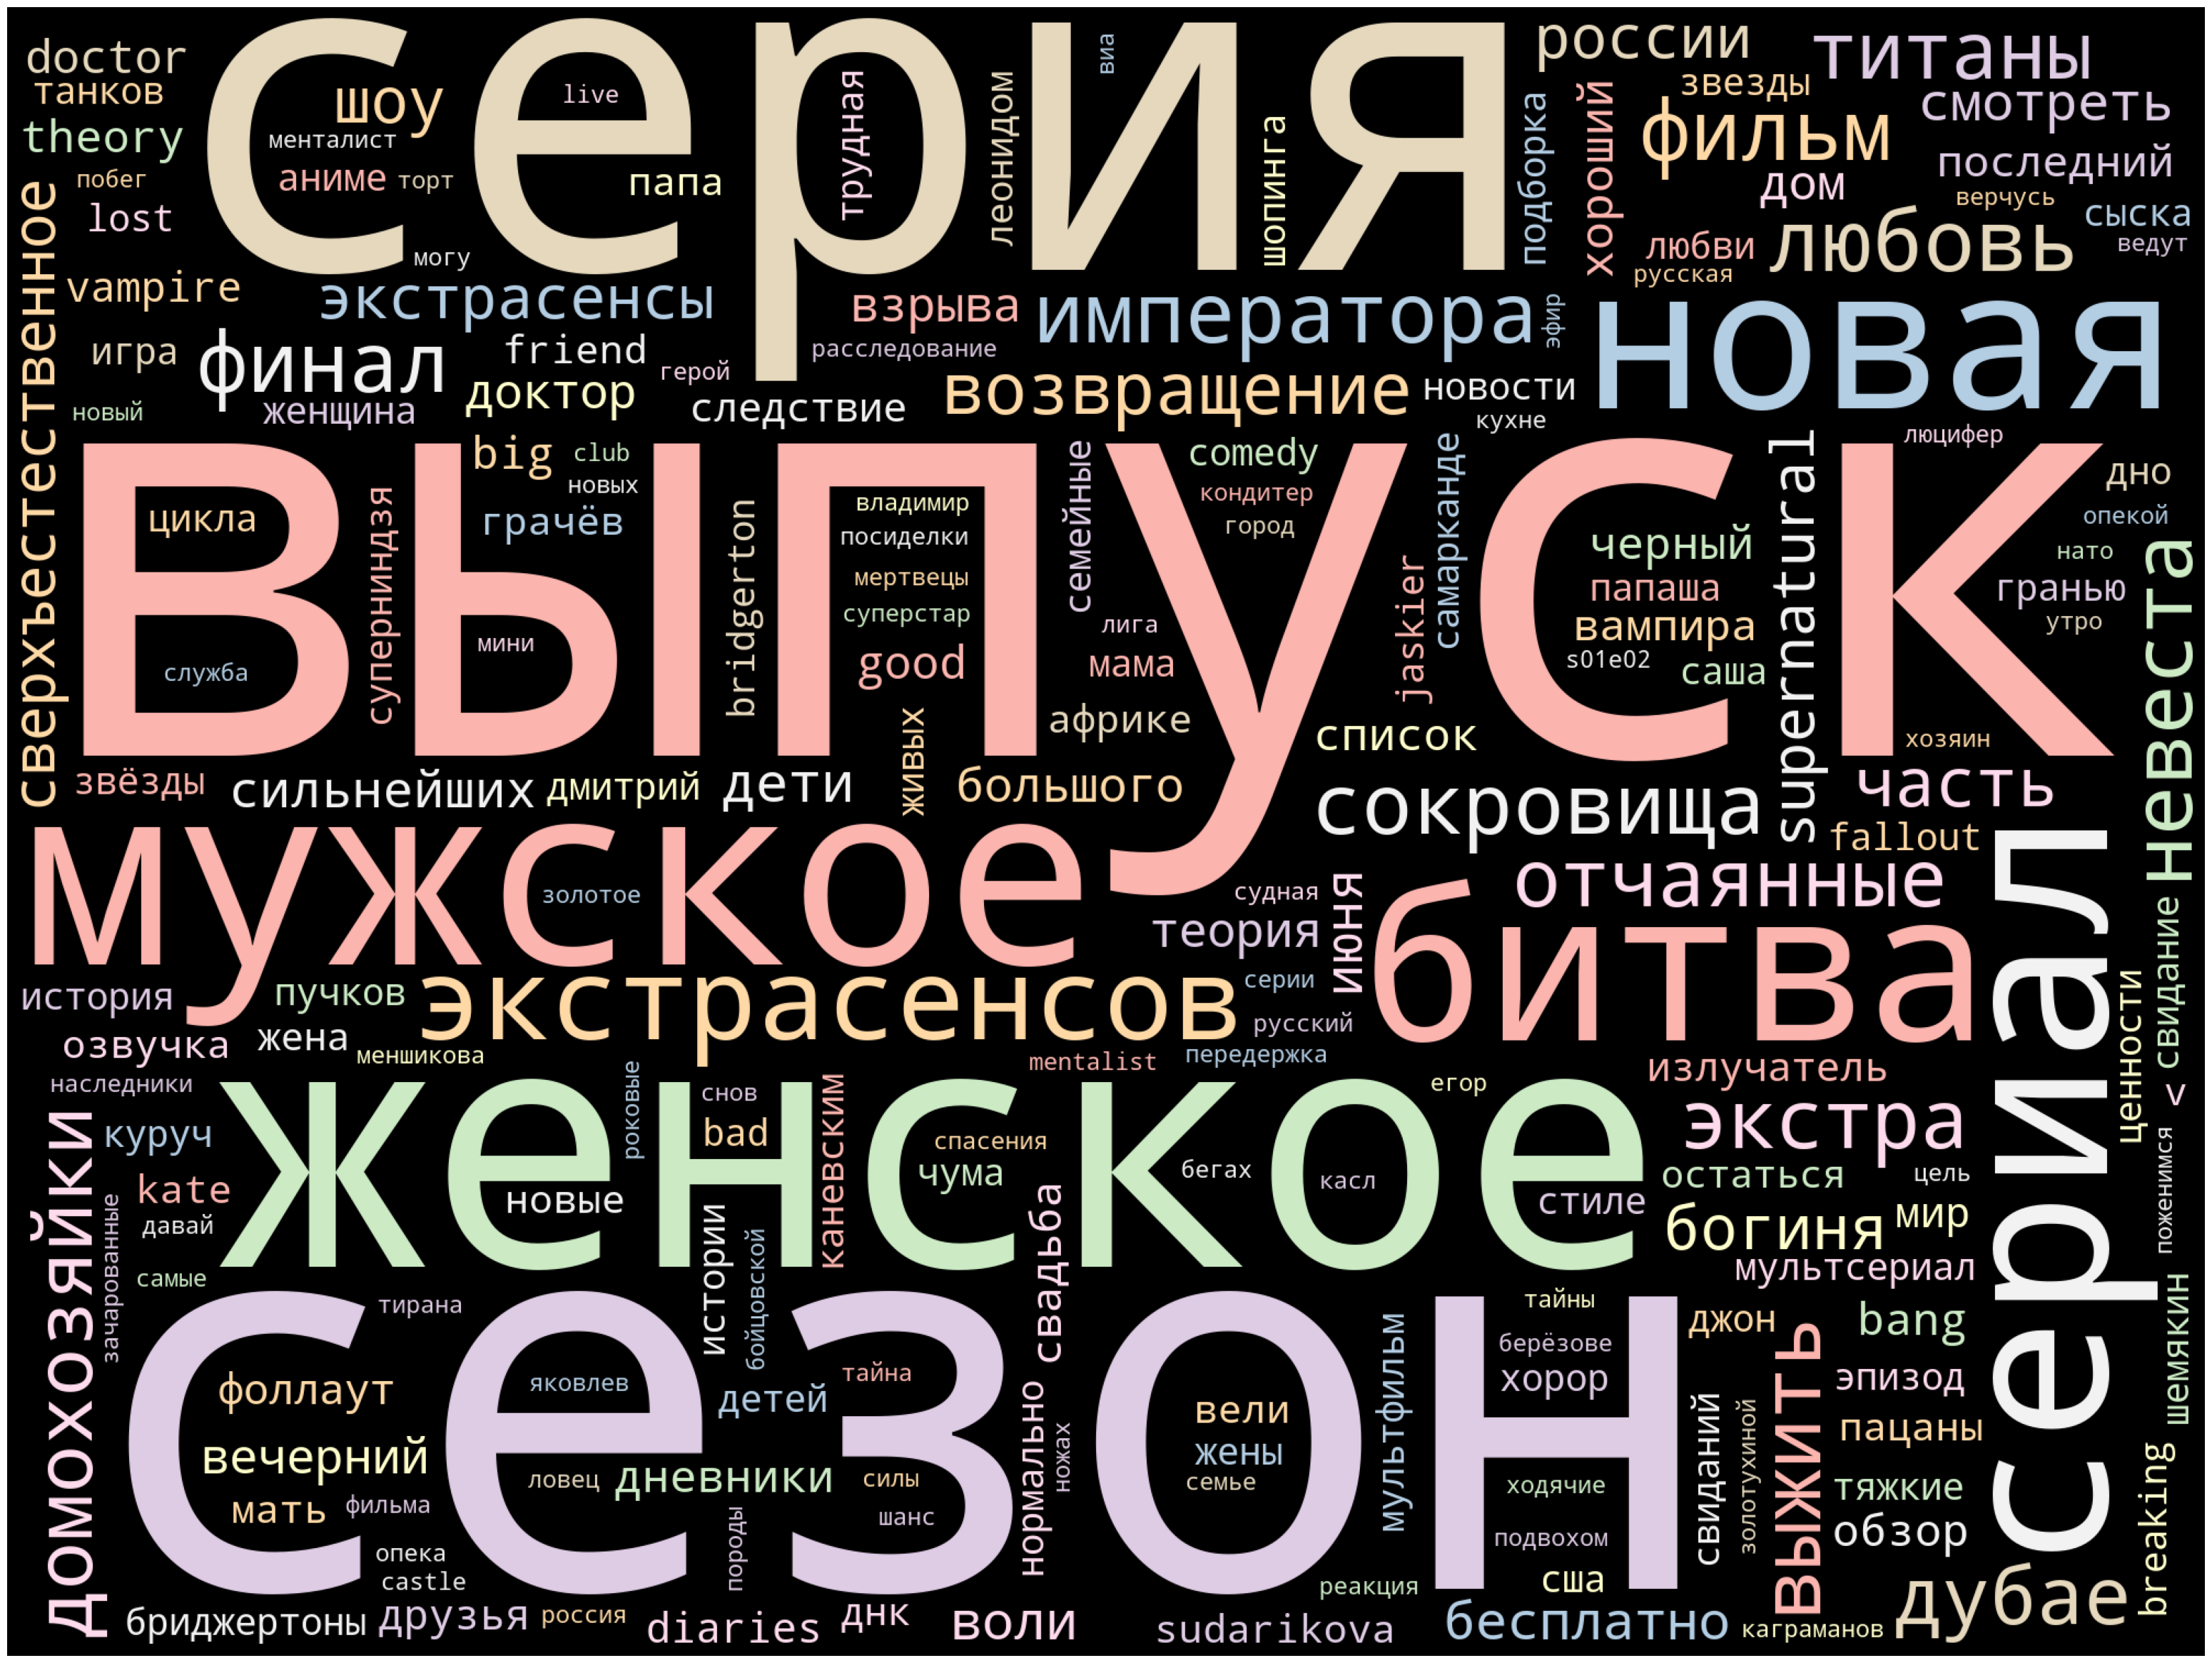

In [105]:
text = ' '.join(merged_df['title']).lower()

text = re.sub(r'==.*?==+', '', text)
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off")
    
STOPWORDS_RU = get_stop_words('russian')
STOPWORDS_ENG = get_stop_words('english')

wordcloud = WordCloud(width = 2000,
                      height = 1500,
                      random_state=1,
                      background_color='black',
                      margin=20, colormap='Pastel1', 
                      collocations=False, stopwords = STOPWORDS_RU + STOPWORDS_ENG).generate(text)

plot_cloud(wordcloud)

In [56]:
roblox

,event_timestamp,region,ua_device_type,ua_client_type,ua_os,ua_client_name,total_watchtime,rutube_video_id,viewer_uid,title,...,age,sex,age_class,latitude,longitude,time_zone,date,time,time of day,Day Type
15973,2024-06-01 16:05:29+00:00,Moscow,smartphone,mobile app,NaN,Rutube,60,video_450635,10174845,СБОРНИК ВЕСЕЛЫХ МУЛЬТФИЛЬМОВ ДЛЯ ДЕТЕЙ - МУЛЬТ...,...,53,male,3,55.751244,37.618423,0,2024-06-01,16:05:29,day,weekend
16536,2024-06-01 16:12:59+00:00,Moscow,smartphone,mobile app,NaN,Rutube,100,video_56092,10174845,ЧАРЛИ И ШОКОЛАДНАЯ ФАБРИКА ► НАСТОЯЩАЯ ВЕРСИЯ ...,...,53,male,3,55.751244,37.618423,0,2024-06-01,16:12:59,day,weekend
16781,2024-06-01 16:15:34+00:00,Moscow,smartphone,mobile app,NaN,Rutube,38,video_16862,10174845,ВЫЖИВИ в IKEA 24 ЧАСА 🔥 Roblox 3008,...,53,male,3,55.751244,37.618423,0,2024-06-01,16:15:34,day,weekend
17411,2024-06-01 16:16:32+00:00,Moscow,smartphone,mobile app,NaN,Rutube,63,video_3986,10174845,Как найти выход из икеи в роблокс ? | Выход из...,...,53,male,3,55.751244,37.618423,0,2024-06-01,16:16:32,day,weekend
18648,2024-06-01 16:18:33+00:00,Moscow,smartphone,mobile app,NaN,Rutube,157,video_268076,10174845,Строю Огромный ДОМ в IKEA Роблокс,...,53,male,3,55.751244,37.618423,0,2024-06-01,16:18:33,day,weekend
80231,2024-06-02 08:06:32+00:00,Moscow,smartphone,mobile app,NaN,Rutube,348,video_118193,10174845,Тест-обзор лодки X-RIVER ROCKY 375 НДВД с дном...,...,53,male,3,55.751244,37.618423,0,2024-06-02,08:06:32,morning,weekend
80914,2024-06-02 07:59:11+00:00,Moscow,smartphone,mobile app,NaN,Rutube,401,video_313004,10174845,В какой ПРОПОРЦИИ смешивать 25:1 или 50:1? Обз...,...,53,male,3,55.751244,37.618423,0,2024-06-02,07:59:11,morning,weekend
183910,2024-06-04 07:23:14+00:00,Kursk Oblast,smartphone,mobile app,NaN,Rutube,903,video_222282,10174845,Эхолот Lowrance Hook2-4x Bullet. Учимся искать...,...,53,male,3,51.727240,36.181989,0,2024-06-04,07:23:14,morning,weekday
185491,2024-06-04 07:55:44+00:00,Kursk Oblast,smartphone,mobile app,NaN,Rutube,275,video_41465,10174845,Обзор Эхолота Lowrance Hook2 4x GPS/Bullet,...,53,male,3,51.727240,36.181989,0,2024-06-04,07:55:44,morning,weekday
187173,2024-06-04 06:09:48+00:00,Kursk Oblast,smartphone,mobile app,NaN,Rutube,551,video_29848,10174845,ПРОЩАНИЕ с Анастасией Заворотнюк | Бузову ОТМЕ...,...,53,male,3,51.727240,36.181989,0,2024-06-04,06:09:48,morning,weekday


In [59]:
roblox_kid = roblox.head(5)

In [61]:
roblox_kid

,event_timestamp,region,ua_device_type,ua_client_type,ua_os,ua_client_name,total_watchtime,rutube_video_id,viewer_uid,title,...,age,sex,age_class,latitude,longitude,time_zone,date,time,time of day,Day Type
15973,2024-06-01 16:05:29+00:00,Moscow,smartphone,mobile app,NaN,Rutube,60,video_450635,10174845,СБОРНИК ВЕСЕЛЫХ МУЛЬТФИЛЬМОВ ДЛЯ ДЕТЕЙ - МУЛЬТ...,...,53,male,3,55.751244,37.618423,0,2024-06-01,16:05:29,day,weekend
16536,2024-06-01 16:12:59+00:00,Moscow,smartphone,mobile app,NaN,Rutube,100,video_56092,10174845,ЧАРЛИ И ШОКОЛАДНАЯ ФАБРИКА ► НАСТОЯЩАЯ ВЕРСИЯ ...,...,53,male,3,55.751244,37.618423,0,2024-06-01,16:12:59,day,weekend
16781,2024-06-01 16:15:34+00:00,Moscow,smartphone,mobile app,NaN,Rutube,38,video_16862,10174845,ВЫЖИВИ в IKEA 24 ЧАСА 🔥 Roblox 3008,...,53,male,3,55.751244,37.618423,0,2024-06-01,16:15:34,day,weekend
17411,2024-06-01 16:16:32+00:00,Moscow,smartphone,mobile app,NaN,Rutube,63,video_3986,10174845,Как найти выход из икеи в роблокс ? | Выход из...,...,53,male,3,55.751244,37.618423,0,2024-06-01,16:16:32,day,weekend
18648,2024-06-01 16:18:33+00:00,Moscow,smartphone,mobile app,NaN,Rutube,157,video_268076,10174845,Строю Огромный ДОМ в IKEA Роблокс,...,53,male,3,55.751244,37.618423,0,2024-06-01,16:18:33,day,weekend


В модели ответ - 0

In [60]:
paxan = roblox.tail(10)

In [72]:
paxan = paxan[['title','age', 'age_class','date','time','time of day','Day Type']]

In [73]:
paxan

,title,age,age_class,date,time,time of day,Day Type
80231,Тест-обзор лодки X-RIVER ROCKY 375 НДВД с дном...,53,3,2024-06-02,08:06:32,morning,weekend
80914,В какой ПРОПОРЦИИ смешивать 25:1 или 50:1? Обз...,53,3,2024-06-02,07:59:11,morning,weekend
183910,Эхолот Lowrance Hook2-4x Bullet. Учимся искать...,53,3,2024-06-04,07:23:14,morning,weekday
185491,Обзор Эхолота Lowrance Hook2 4x GPS/Bullet,53,3,2024-06-04,07:55:44,morning,weekday
187173,ПРОЩАНИЕ с Анастасией Заворотнюк | Бузову ОТМЕ...,53,3,2024-06-04,06:09:48,morning,weekday
187270,Как выбрать правильный винт для лодочного мотора,53,3,2024-06-04,04:31:02,night,weekday
821969,"Стиральная машина BOSCH не отжимает, не набира...",53,3,2024-06-14,05:59:58,morning,weekday
1101785,"КРУЧЕ КИТАЙСКИХ КРОССОВЕРОВ В РАЗЫ! Дороже, но...",53,3,2024-06-19,16:39:55,day,weekday
1160813,Сеструха сериал 2023 (2 серия),53,3,2024-06-20,08:13:58,morning,weekday
1163245,Сеструха 3 серия обзор,53,3,2024-06-20,08:16:43,morning,weekday


В модели ответ - 3

Вывод, есть люди, у которых смотрят дети 